# Data Preprocessing

## Importing the libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [24]:
df = pd.read_csv('Purchase_Data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [26]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [28]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [30]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [32]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [34]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [35]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [36]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [37]:
print(y_test)

[0 1]


## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
print(X_train)

[[-0.77459667 -0.57735027  1.29099445 -0.19159184 -1.07812594]
 [-0.77459667  1.73205081 -0.77459667 -0.01411729 -0.07013168]
 [ 1.29099445 -0.57735027 -0.77459667  0.56670851  0.63356243]
 [-0.77459667 -0.57735027  1.29099445 -0.30453019 -0.30786617]
 [-0.77459667 -0.57735027  1.29099445 -1.90180114 -1.42046362]
 [ 1.29099445 -0.57735027 -0.77459667  1.14753431  1.23265336]
 [-0.77459667  1.73205081 -0.77459667  1.43794721  1.57499104]
 [ 1.29099445 -0.57735027 -0.77459667 -0.74014954 -0.56461943]]


In [40]:
print(X_test)

[[-0.77459667  1.73205081 -0.77459667 -1.46618179 -0.9069571 ]
 [ 1.29099445 -0.57735027 -0.77459667 -0.44973664  0.20564034]]


In [41]:
df.sample(5)

,Country,Age,Salary,Purchased
3,Spain,38.0,61000.0,No
2,Germany,30.0,54000.0,No
9,France,37.0,67000.0,Yes
7,France,48.0,79000.0,Yes
4,Germany,40.0,NaN,Yes


UNIVARIATE ANALYSIS

<Axes: >

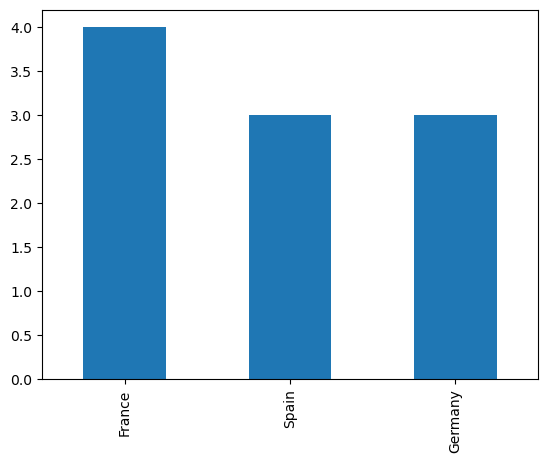

In [44]:
df['Country'].value_counts().plot(kind='bar')

(array([1., 1., 0., 1., 2., 1., 0., 1., 0., 2.]),
 array([27. , 29.3, 31.6, 33.9, 36.2, 38.5, 40.8, 43.1, 45.4, 47.7, 50. ]),
 <BarContainer object of 10 artists>)

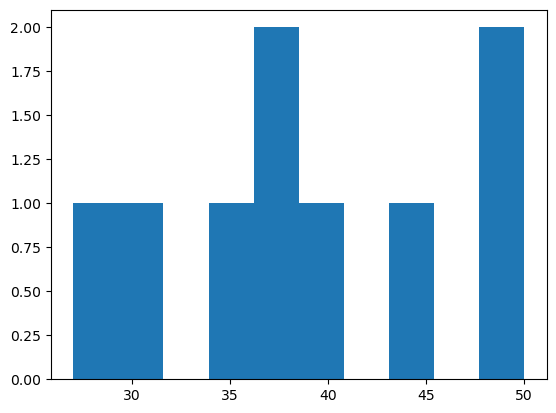

In [46]:
plt.hist(df['Age'])

(array([1., 2., 1., 1., 0., 1., 1., 0., 1., 1.]),
 array([48000., 51500., 55000., 58500., 62000., 65500., 69000., 72500.,
        76000., 79500., 83000.]),
 <BarContainer object of 10 artists>)

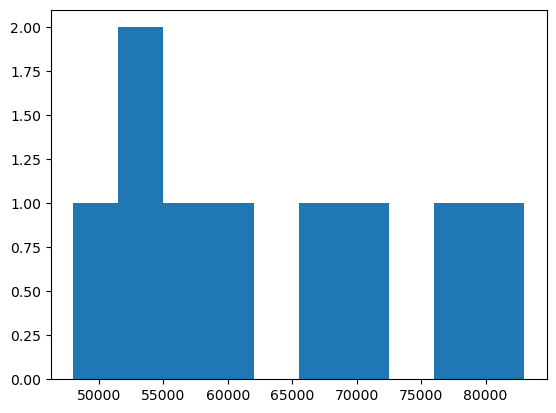

In [47]:
plt.hist(df['Salary'])

C:\Users\ws\AppData\Local\Temp\ipykernel_8936\2233161363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

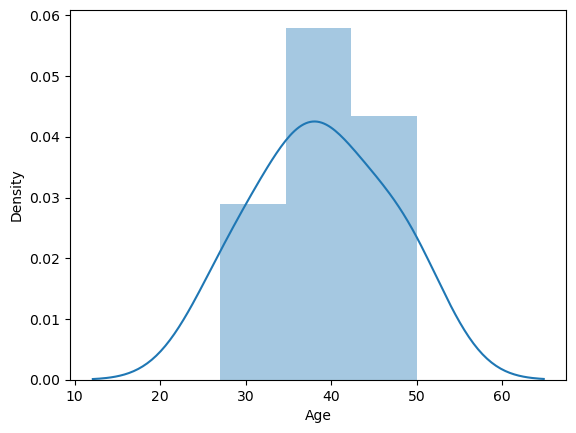

In [48]:
import seaborn as sns
sns.distplot(df['Age'])

<Axes: >

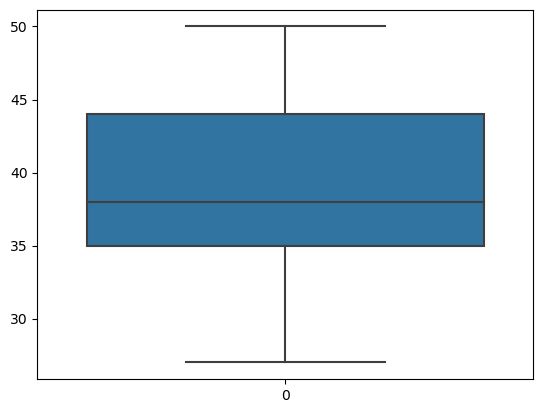

In [51]:
sns.boxplot(df['Age'])

<Axes: >

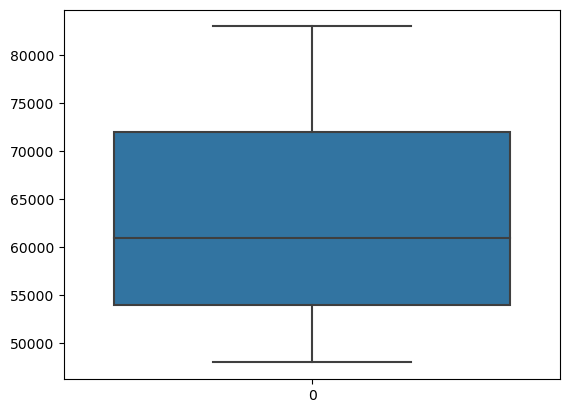

In [52]:
sns.boxplot(df['Salary'])

NO OUTLIERS IN AGE AND SALARY

Bivariate Analysis

In [53]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

<Axes: xlabel='Country', ylabel='Salary'>

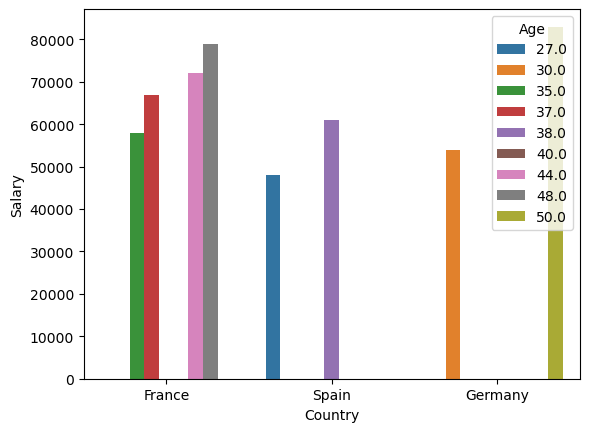

In [57]:
sns.barplot(x='Country',y='Salary',data=df,hue='Age')

<Axes: xlabel='Purchased', ylabel='Salary'>

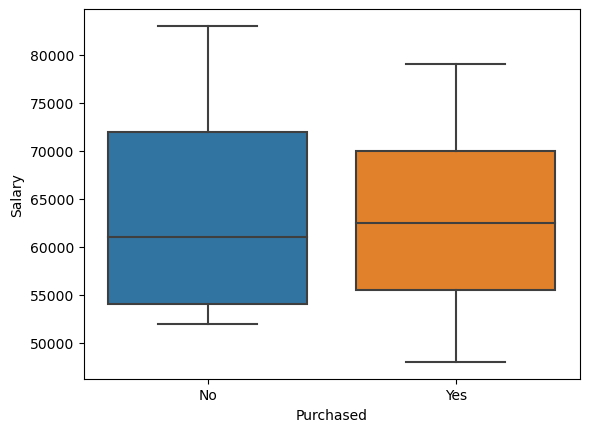

In [65]:
sns.boxplot(x='Purchased',y='Salary',data=df)

<Axes: xlabel='Purchased', ylabel='Salary'>

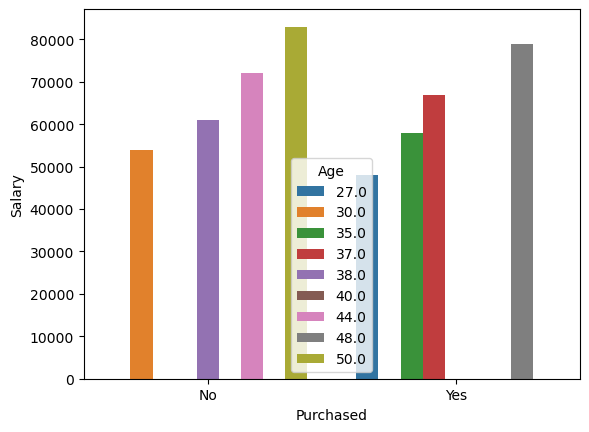

In [67]:
sns.barplot(x='Purchased',y='Salary',data=df,hue='Age')

In [79]:
#sns.distplot(df[df['Purchased']==0]['Age'],hist=False)
#sns.distplot(df[df['Purchased']==1]['Age'],hist=False)

In [82]:
pd.crosstab(df['Country'],df['Purchased'])

Purchased,No,Yes
Country,,
France,1,3
Germany,2,1
Spain,2,1


<Axes: xlabel='Purchased', ylabel='Country'>

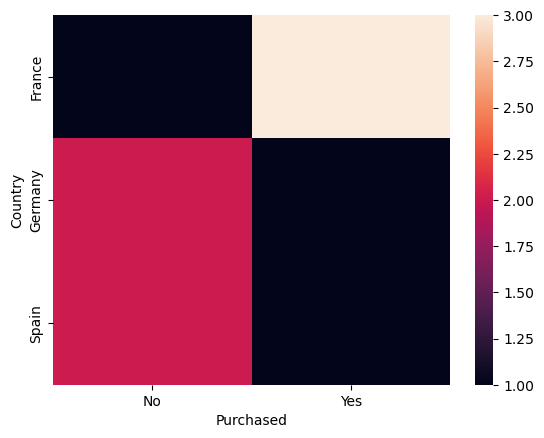

In [83]:
sns.heatmap(pd.crosstab(df['Country'],df['Purchased']))